In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


For more information, read [Cortez and Morais, 2007].
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

In [5]:
from ucimlrepo import fetch_ucirepo 

In [7]:
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
x = forest_fires.data.features 
y = forest_fires.data.targets 

In [8]:
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [11]:
y

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
512,6.44
513,54.29
514,11.16
515,0.00


In [13]:
# variable information 
print(forest_fires.variables) 

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [17]:
x['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [19]:
cat_cols=[]
num_cols=[]
for i in x.columns:
    if x[i].dtype=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [21]:
import category_encoders as ce

In [23]:
# encoder=ce.OneHotEncoder(cols=num_cols)
# x=encoder.fit_transform(x)
# x

In [25]:
encoder=ce.OrdinalEncoder(cols=cat_cols)
x=encoder.fit_transform(x)
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,1,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,2,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,1,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,1,4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,3,4,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,3,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,3,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,3,3,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [27]:
x.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,3.862669,3.802708,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,1.939616,1.930917,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,3.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,4.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

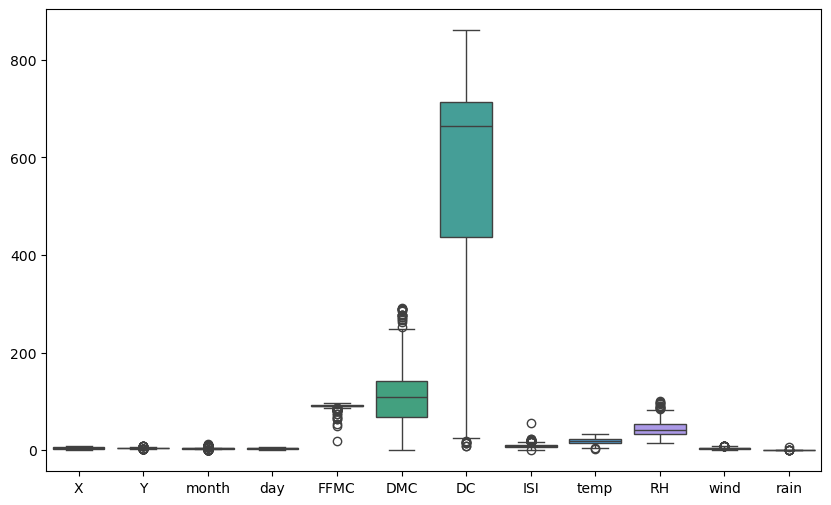

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=x)
plt.show()

In [33]:
def remove_outliers(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    x=x[(x>=lower_bound)&(x<=upper_bound)]
    
    return x

In [35]:
x=remove_outliers(x)

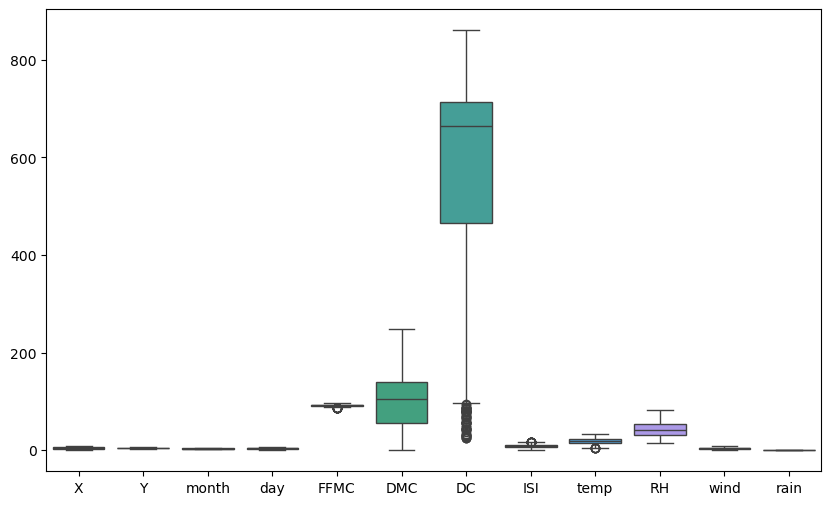

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=x)
plt.show()

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       466 non-null    float64
 2   month   380 non-null    float64
 3   day     517 non-null    int32  
 4   FFMC    464 non-null    float64
 5   DMC     500 non-null    float64
 6   DC      509 non-null    float64
 7   ISI     494 non-null    float64
 8   temp    515 non-null    float64
 9   RH      505 non-null    float64
 10  wind    504 non-null    float64
 11  rain    509 non-null    float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 46.6 KB


In [45]:
x['month'].unique()

array([nan,  2.,  3.,  4.,  5.])

In [41]:
x.isnull().sum()

X          0
Y         51
month    137
day        0
FFMC      53
DMC       17
DC         8
ISI       23
temp       2
RH        12
wind      13
rain       8
dtype: int64

In [43]:
import numpy as np

In [51]:
for i in x.columns:
    x[i]=x[i].replace(np.nan,x[i].mean())

In [53]:
x.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
dtype: int64

In [55]:
x.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0
mean,4.669246,4.448498,3.460526,3.802708,91.890733,105.184200,556.326326,8.514372,18.950097,43.168317,3.894048,0.0
std,2.313778,0.870783,0.525342,1.930917,1.824993,56.077646,238.858202,3.436745,5.723220,14.585002,1.616426,0.0
min,1.000000,3.000000,2.000000,1.000000,86.200000,1.100000,25.600000,0.400000,4.600000,15.000000,0.400000,0.0
25%,3.000000,4.000000,3.000000,2.000000,91.000000,68.600000,466.600000,6.500000,15.600000,33.000000,2.700000,0.0
50%,4.000000,4.000000,3.460526,4.000000,91.890733,105.184200,664.200000,8.400000,19.300000,42.000000,3.894048,0.0
75%,7.000000,5.000000,4.000000,5.000000,92.900000,137.000000,713.900000,10.100000,22.800000,52.000000,4.900000,0.0
max,9.000000,6.000000,5.000000,7.000000,96.200000,248.400000,860.600000,17.000000,33.300000,82.000000,8.000000,0.0


In [57]:
x['month'].unique()

array([3.46052632, 2.        , 3.        , 4.        , 5.        ])

In [62]:
y

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
512,6.44
513,54.29
514,11.16
515,0.00


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)

C:\Users\PHANEENDRA\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000)

In [66]:
model.score(x_test,y_test)

-0.02199848348203126